In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat

In [2]:
#Reading the csv file
datau=pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/Udemy/udemy-courses/udemy_courses.csv")
datau

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development
3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development
3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development
3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development


In [3]:
#lets get some general informations
print(datau.shape, datau.ndim, datau.size)

(3683, 12) 2 44196


In [4]:
#lets see the number of unique values in each column
def unique_in_csv(data):
    for o in data:
        print("{0}={1}".format(o,data[o].unique()), end="\n\n")
        
unique_in_csv(datau)

course_id=[1070968 1113822 1006314 ...  635248  905096  297602]

course_title=['Ultimate Investment Banking Course'
 'Complete GST Course & Certification - Grow Your CA Practice'
 'Financial Modeling for Business Analysts and Consultants' ...
 'Learn and Build using Polymer'
 'CSS Animations: Create Amazing Effects on Your Website'
 "Using MODX CMS to Build Websites: A Beginner's Guide"]

url=['https://www.udemy.com/ultimate-investment-banking-course/'
 'https://www.udemy.com/goods-and-services-tax/'
 'https://www.udemy.com/financial-modeling-for-business-analysts-and-consultants/'
 ... 'https://www.udemy.com/learn-and-build-using-polymer/'
 'https://www.udemy.com/css-animations-create-amazing-effects-on-your-website/'
 'https://www.udemy.com/using-modx-cms-to-build-websites-a-beginners-guide/']

is_paid=['True' 'False' 'FALSE' 'TRUE'
 'https://www.udemy.com/learnguitartoworship/']

price=['200' '75' '45' '95' '150' '65' '195' '30' '20' '50' '175' '140' '115'
 '190' '125' '60' '145' '1

In [5]:
#lets make a deep copy 1st
datau1=datau.copy(deep=True).reset_index()

In [6]:
datau1

,index,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development
3679,3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development
3680,3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development
3681,3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development


In [7]:
#As we saw that in course duration, there are some courses which doesnt consist any lectures
#We have to remove these for making further operations
datau1["one"]=datau1["content_duration"].str.split(" ").str[0]
datau1["two"]=datau1["content_duration"].str.split(" ").str[1]

In [8]:
datau1

,index,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,one,two
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,1.5,hours
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,39,hours
2,2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,2.5,hours
3,3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,3,hours
4,4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,2,hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development,2,hours
3679,3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development,3.5,hours
3680,3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development,3.5,hours
3681,3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development,3,hours


In [9]:
datau1.query("two== 'questions'")

,index,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,one,two
93,93,1259560,Test your knowledge in Basics of Accounting,https://www.udemy.com/test-your-knowledge-in-b...,True,30,1000,11,0,Beginner Level,218 questions,2017-06-20T05:56:52Z,Business Finance,218,questions
95,95,1270254,Test your Knowledge in Cost Accounting,https://www.udemy.com/test-your-knowledge-in-c...,True,30,999,3,0,All Levels,18 questions,2017-06-27T10:43:44Z,Business Finance,18,questions
847,847,1271684,Test your Knowledge in Banking Credit Analysis...,https://www.udemy.com/banking-credit-analysis-...,True,30,17,0,0,All Levels,24 questions,2017-06-30T10:45:11Z,Business Finance,24,questions
970,970,1259396,Test your knowledge in Financial Management,https://www.udemy.com/test-your-knowledge-in-f...,True,30,20,0,0,All Levels,82 questions,2017-06-21T05:05:10Z,Business Finance,82,questions


In [10]:
datau1.query("two== 'Level'")

,index,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,one,two
2066,2066,96698,Learn Classical Guitar Technique and play 'Spa...,"000!""",https://www.udemy.com/learnguitartoworship/,TRUE,30,1463,29,52,Beginner Level,3 hours,Musical Instruments,Beginner,Level


In [11]:
datau1=datau1.drop([93,95,847,970,2066], axis=0).reset_index(drop=True)

Genreal Exploration

(array([275., 283., 309., 365., 459., 433., 423., 448., 365., 318.]),
 array([   8324.,  135698.,  263072.,  390446.,  517820.,  645194.,
         772568.,  899942., 1027316., 1154690., 1282064.]),
 <a list of 10 Patch objects>)

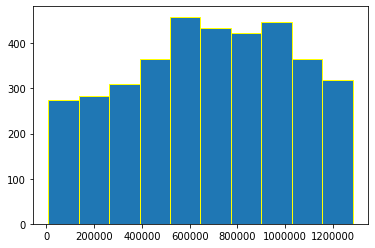

In [12]:
plt.hist(datau1["course_id"], edgecolor="yellow")

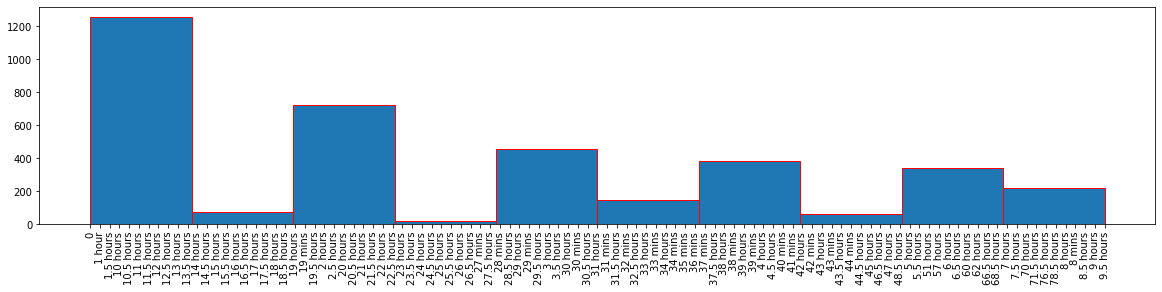

In [13]:
plt.figure(figsize=(20,4))
plt.hist(datau1["content_duration"].sort_values(), edgecolor="red")
plt.xticks(rotation=90)
plt.show()

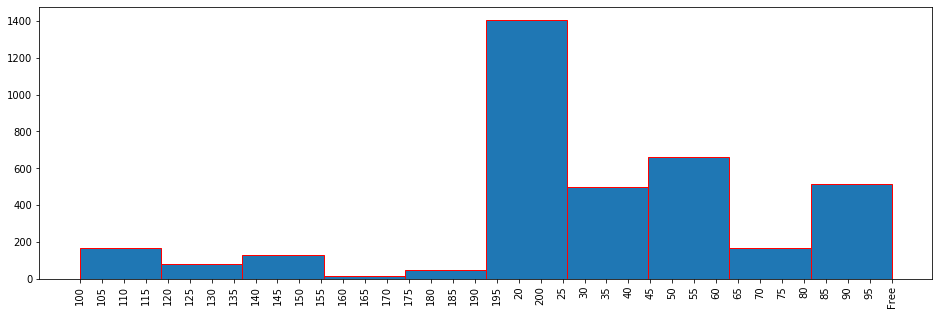

In [14]:
plt.figure(figsize=(16,5))
plt.hist(datau1["price"].sort_values(), edgecolor="red")
plt.xticks(rotation=90)
plt.show()

In [15]:
datau1["price"].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [16]:
datau1["price"]=datau1["price"].str.replace("Free",'0').str.replace("TRUE",'0')
datau1["price"]=datau1["price"].astype('float')

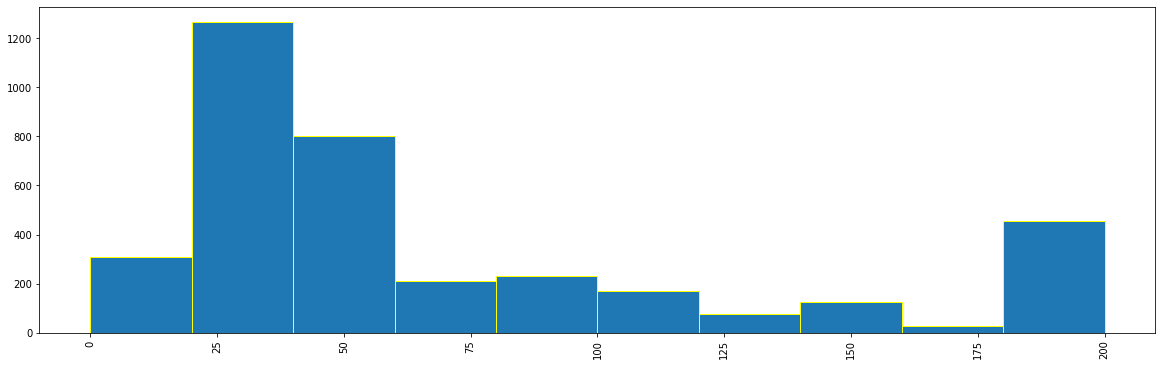

In [17]:
plt.figure(figsize=(20,6))
plt.hist(datau1["price"].sort_values(),edgecolor="yellow")
plt.xticks(rotation=90)
plt.show()

In [18]:
uni=len(datau1["course_id"].unique())
unt=len(datau1["course_title"].unique())
unr=len(datau1["url"].unique())
print(uni,unt,unr)

3672 3663 3672


<BarContainer object of 3 artists>

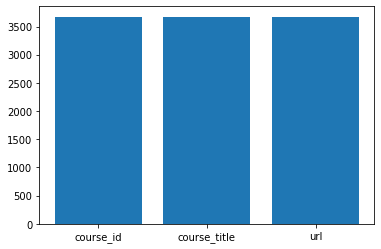

In [19]:
plt.bar(["course_id","course_title","url"],[uni,unt,unr])

In [20]:
datau1["is_paid"]=datau1["is_paid"].str.replace("https://www.udemy.com/learnguitartoworship/","True")
datau1["is_paid"].value_counts()

True     2734
TRUE      634
False     264
FALSE      46
Name: is_paid, dtype: int64

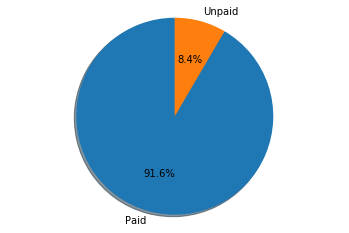

In [21]:
#now is_paid is having 5 types of values 'True' 'False' 'FALSE' 'TRUE'
#Where True and TRUE are same likewise False and FALSE are same
#now let's see the in 100%, how these are divided
t,T,f,F=datau1["is_paid"].value_counts()
labels="Paid","Unpaid"
explode=(0,0)
fig, ax=plt.subplots()
ax.pie([t+T,F+f], explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [22]:
datau1["subject"].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

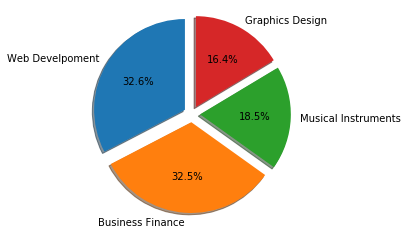

In [23]:
#now lets see how how these 4 are divided in 100% using pie chart
#t,T,f,F=datau1["is_paid"].value_counts()
labels="Web Develpoment","Business Finance","Musical Instruments","Graphics Design"
explode=(0.09,0.09,0.09,0.09)
fig, ax=plt.subplots()
ax.pie(datau1["subject"].value_counts(), explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [24]:
u=datau1["level"].value_counts()

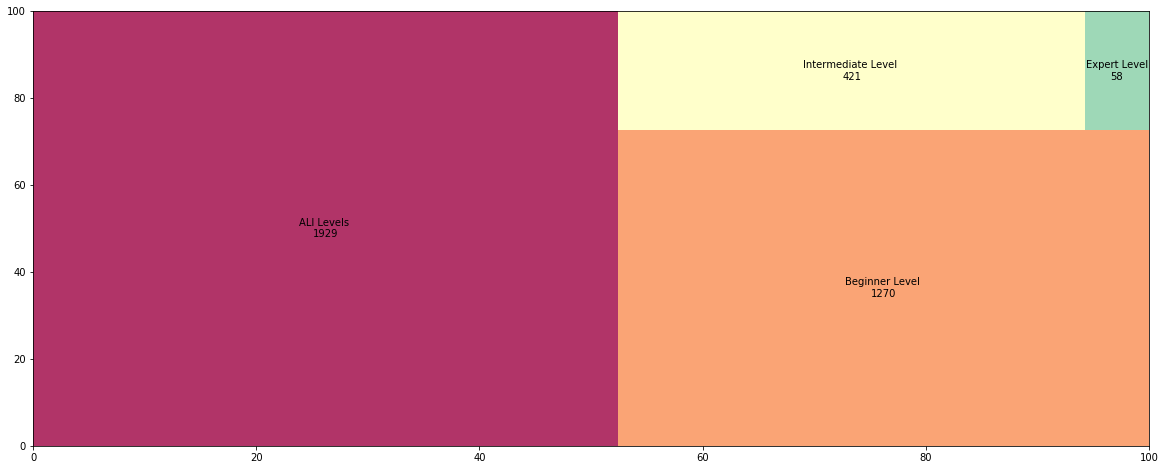

In [25]:
#For understanding the composition of level, we wull make a Tree map
import squarify #for making treemap, we need squarify
plt.figure(figsize=(20,8))
labels=["ALl Levels \n"+str(u[0]),"Beginner Level \n"+str(u[1]),"Intermediate Level \n"+str(u[2]),"Expert Level\n"+str(u[3])]
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
squarify.plot(sizes=datau1["level"].value_counts(),color=colors, label=labels, alpha=.8)

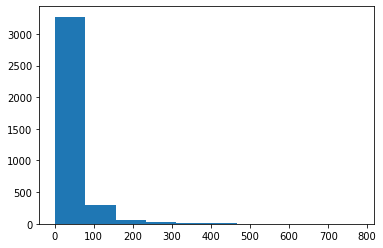

In [26]:
#Lets see Number of lectures we have
plt.hist(datau1["num_lectures"])
plt.show()

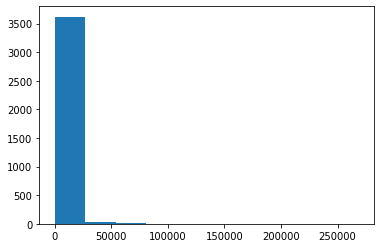

In [27]:
#Lets see Number of Subscribers we have
plt.hist(datau1["num_subscribers"])
plt.show()

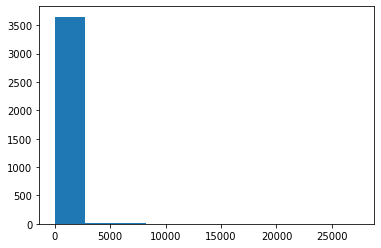

In [28]:
#Lets see Number of Reviews we have
plt.hist(datau1["num_reviews"])
plt.show()